<a href="https://colab.research.google.com/github/kp20409/CE888/blob/main/LAB2/Copy_of_bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following the bootstrap algorithm (check the lecture notes!)

In [2]:
import matplotlib
import pandas as pd
import seaborn as sns
import numpy as np



In [4]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
data = df.values.T[1]

In [13]:
# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval

import random

def bootstrap_mean(x, sample_size, n_bootstraps):
	
  sample_matrix = []
  bootstraps_mean = []

  for i in range(n_bootstraps):
      sample = []

      for i in range(sample_size):
        sample.append(random.choice(x))
      
      sample_matrix.append(sample)
      bootstraps_mean.append(np.mean(sample)) 
  
  lower, upper = np.percentile(bootstraps_mean, [2.5, 97.5])
  
  return np.mean(bootstraps_mean), lower, upper

	

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

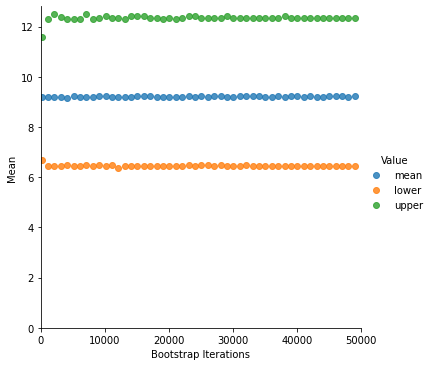

In [14]:
# Call your bootstrap function and plot the results


boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



Now, modify the bootstrap function you created above so that you can pass your desired confidence interval as a parameter.



In [15]:
def bootstrap_mean_ci(x, sample_size, n_bootstraps, ci):
  sample_matrix = []
  boots_mean = []

  for i in range(n_bootstraps):
      sample = []

      for i in range(sample_size):
        sample.append(random.choice(x))
      
      sample_matrix.append(sample)
      boots_mean.append(np.mean(sample))
  
  lower_bound = ((100-ci)/2)
  upper_bound = 100-lower_bound

  lower, upper = np.percentile(boots_mean, [lower_bound, upper_bound])
  
  return np.mean(boots_mean), lower, upper

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 50000.0)

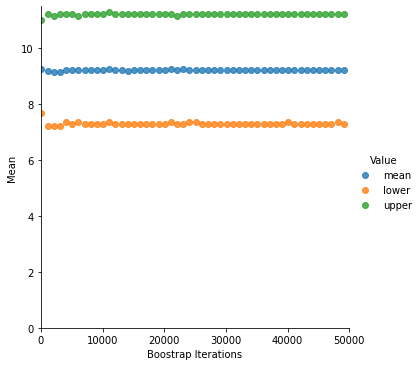

In [16]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)



# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


No handles with labels found to put in legend.


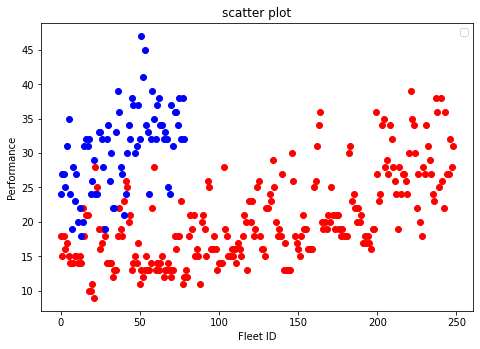

In [19]:
# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")
import matplotlib.pyplot as plt

# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).

# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
pd.set_option('display.max_rows', df.shape[0]+1)


current_fleet = df.values.T[0]
new_fleet = df.values.T[1]

new_fleet_nan = new_fleet[np.logical_not(np.isnan(new_fleet))]

fleet_id = []
for i in range(len(current_fleet)):
  fleet_id.append(i)

fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(fleet_id, current_fleet, color='r')
ax.scatter(fleet_id, new_fleet, color='b')
ax.set_xlabel('Fleet ID')
ax.set_ylabel('Performance')
ax.set_title('scatter plot')
plt.legend()
plt.show()

# Note: you can add more cells as needed to organise your code and your plots


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) -- you can do this with a permutation test (check the lecture notes!)

In [22]:
def bootstrap_std_ci(x, sample_size, n_bootstraps, ci):
  sample_matrix = []
  boots_std = []

  for i in range(n_bootstraps):
      sample = []

      for i in range(sample_size):
        sample.append(random.choice(x))
      
      sample_matrix.append(sample)
      boots_std.append(np.std(sample))

  #print(bootstraps_mean)
  

  l_bound = ((100-ci)/2)
  u_bound = 100-l_bound

  lower, upper = np.percentile(boots_std, [l_bound, u_bound])
  #print(np.mean(bootstraps_mean), lower, upper)
  return np.mean(boots_std), lower, upper

In [29]:
# <---INSERT YOUR CODE HERE--->
current_fleet_mean = np.mean(current_fleet)
new_fleet = new_fleet[np.logical_not(np.isnan(new_fleet))]
new_fleet_mean = np.mean(new_fleet)
print('Current Fleet Mean : ', current_fleet_mean)
print('New Fleet Mean : ', new_fleet_mean)


current_boot = bootstrap_mean_ci(current_fleet, current_fleet.shape[0], 10000, 80)
new_boot = bootstrap_mean_ci(new_fleet, new_fleet.shape[0], 10000, 80)
print('80% CI of mean of current fleet: ',current_boot)
print('80% CI of mean of new fleet: ',new_boot)

std_boot_new = bootstrap_std_ci(new_fleet, new_fleet.shape[0], 10000, 95)
print('95% CI of std of new fleet: ',std_boot_new)

std_boot_old = bootstrap_std_ci(current_fleet, current_fleet.shape[0], 10000, 99)
print('99% CI of std of old fleet: ',std_boot_old)


Current Fleet Mean :  20.14457831325301
New Fleet Mean :  30.481012658227847
80% CI of mean of current fleet:  (20.144019277108438, 19.634538152610443, 20.65863453815261)
80% CI of mean of new fleet:  (30.48184683544304, 29.594936708860764, 31.343037974683547)
95% CI of std of new fleet:  (6.013468992186433, 5.124125833191624, 6.919086803431989)
99% CI of std of old fleet:  (6.387271354433292, 5.616448632054605, 7.096272478444334)


In [26]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):

    s1_mean = np.mean(sample1)
    s2_mean = np.mean(sample2)

    t_obs = s2_mean-s1_mean

    
    concat_array = np.concatenate((sample1, sample2))
    score = 0

    for i in range(n_permutations):
      perm = np.random.permutation(concat_array)
      old_array = perm[:len(sample1)]
      new_array = perm[len(sample1):len(perm)]
      

      old_mean = np.mean(old_array)
    
      new_mean = np.mean(new_array)

      t_perm = new_mean-old_mean

      if(t_perm>t_obs):
        score = score+1

    pvalue = score/n_permutations

    return pvalue

print(permut_test(current_fleet, new_fleet_na, 30000))

0.0
